Original Signal: [1. 2. 3. 4. 5.]
Noisy Signal: [1.02373039 1.42768424 2.98956097 3.56583787 4.84810214]


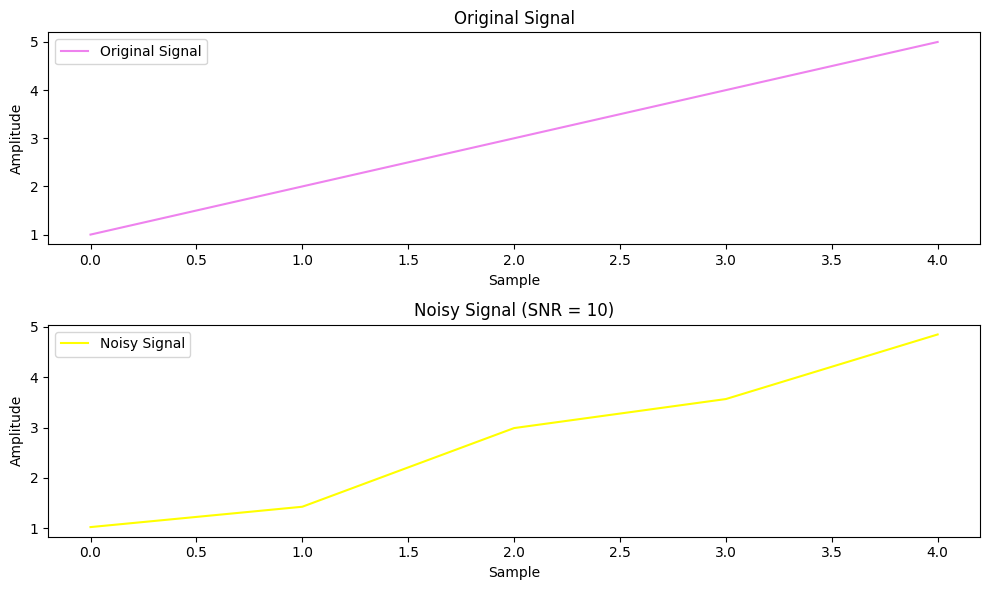

In [1]:
# Add Noise
import numpy as np
import matplotlib.pyplot as plt

# Noise follows normal distribution (mean and standard deviation (M & SD)) 
# snr=signal-to-noise ratio, nar = noise amplitude range
def add_gaussian_noise(signal, snr, noise_amplitude_range=(0.1, 0.5)):

    # Calculate signal power
    signal_power = np.mean(np.abs(signal) ** 2)
    
    # Calculate noise power based on SNR
    noise_power = signal_power / snr
    
    # Calculate standard deviation of the noise
    noise_std = np.sqrt(noise_power)
    
    # Generate random noise amplitudes within the specified range
    min_amp, max_amp = noise_amplitude_range
    noise_amplitudes = np.random.uniform(min_amp, max_amp, len(signal))
    
    # Generate Gaussian noise samples
    noise = np.random.normal(0, noise_amplitudes * noise_std, len(signal))
    
    # Add noise to signal
    noisy_signal = signal + noise
    
    return noisy_signal

# Example
original_signal = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
snr = 10
noisy_signal = add_gaussian_noise(original_signal, snr)

print("Original Signal:", original_signal)
print("Noisy Signal:", noisy_signal)

# Plot original & noisy signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(original_signal, label='Original Signal', color='violet')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(noisy_signal, label='Noisy Signal', color='yellow')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Noisy Signal (SNR = {})'.format(snr))
plt.legend()

plt.tight_layout()
plt.show()